# Setup/Run PPDisk Simple Model 1 Part 1 - Dust
* CREDIT: RADMC-3D EXAMPLES
* MODELING TARGET: HD163296

## 00 - About ***radmc3dPy.models.ppdisk module***
Generic protoplanetary disk model<br>
The density is given by

* $\rho = \frac{\Sigma(r,\phi)}{H_p\sqrt{(2\pi)}}\exp{(-\frac{z^2}{2H_p^2})}$

    * $\Sigma$ - Surface density
    * $H_p$ - Pressure scale height

There are two options for the functional form of surface density as a function of radius. For a simple power-law the surface density is given by

* $\Sigma(r)=\Sigma_0 (\frac{r}{r_{out}})^p$

alternatively the surface density can also have an exponential outer tapering:

* $\Sigma(r)=\Sigma_0 (\frac{r}{r_{out}})^p \exp[-(\frac{r}{r_{out}})^{2-p}]$

The molecular abundance function takes into account dissociation and <b>freeze-out of the molecules For photodissociation only the continuum (dust) shielding is taken into account in a way that whenever the continuum optical depth radially drops below a threshold value the molecular abundance is dropped to zero.</b> For freeze-out the molecular abundance below a threshold temperature is decreased by a given fractor.

## 00 - About *HD163296*

### Information:
* RA DEC (FK5): 17h53m20.6063742757s -21d56m57.379723676s
* Star Class: Herbig Ae/Be star
* Spectral Type: A1Vep C
* Star Mass: 2.3 $M_{\odot}$
* Star Radius: 1.66 $R_{\odot}$
* Star Temperature: 9330 K
* Distance to us: 140. pc
* Inclination Angle: $42^{\circ}$
* Position Angle: $132^{\circ}$
* Disk Radius: 250. unit:AU
* Gap Position: 60., 100., 160. unit:AU

### Reference:
* *Rosenfeld et al.(2013)*
* *Isella et al. (2016)*
* *Gregorio-Monsalvo et al. (2013)*
* http://simbad.u-strasbg.fr/simbad/sim-id?Ident=HD+163296
* http://www.exoplanetkyoto.org/exohtml/HD_163296.html
* https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html

## 01 - Set Up

In [36]:
import numpy as np
from radmc3dPy import *
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt

## 02 - Functions for calculating Paramters
* All calculation functions are in **CYLINDRICAL** Coordinate

### (1) Calculate Dust Column Density and Dust Density

In [37]:
def cal_H(cr):
    '''
    calculate disk scale height
    '''
    H = (16. * (cr/(150.*natconst.au))**1.35) * natconst.au
    return H

def cal_sigmad_mode1(cr, gamma):
    '''
    calculate dust column density
    No taper term
    '''
    rc = 90.*natconst.au
    cden0 = 0.42
    cden = cden0 * ((cr/rc)**(-gamma))
    return cden

def cal_sigmad_mode2(cr, gamma):
    '''
    calculate dust column density
    with taper term
    '''
    rc = 90.*natconst.au
    cden0 = 0.42 #g/cm2
    cden = cden0 * ((cr/rc)**(-gamma)) * np.exp(-((cr/rc)**(2-gamma)))
    return cden

def cal_den_mode1(cr, z, gamma):
    '''
    calculate dust density
    from sigmad with no taper term
    '''
    H = cal_H(cr)
    cden = cal_sigmad_mode1(cr, gamma)
    den = cden / ((2*np.pi)**0.5 * H) * np.exp(-z**2/(2*H**2))
    return den

def cal_den_mode2(cr, z, gamma):
    '''
    calculate dust density
    from sigmad with taper term
    '''
    H = cal_H(cr)
    cden = cal_sigmad_mode2(cr, gamma)
    den = cden / ((2*np.pi)**0.5 * H) * np.exp(-z**2/(2*H**2))
    return den

def cal_den_mode3(cr, z, cden, gamma):
    '''
    calculate dust density
    from sigmad with taper term
    with known dust column density
    '''
    H = cal_H(cr)
    den = cden / ((2*np.pi)**0.5 * H) * np.exp(-z**2/(2*H**2))
    return den

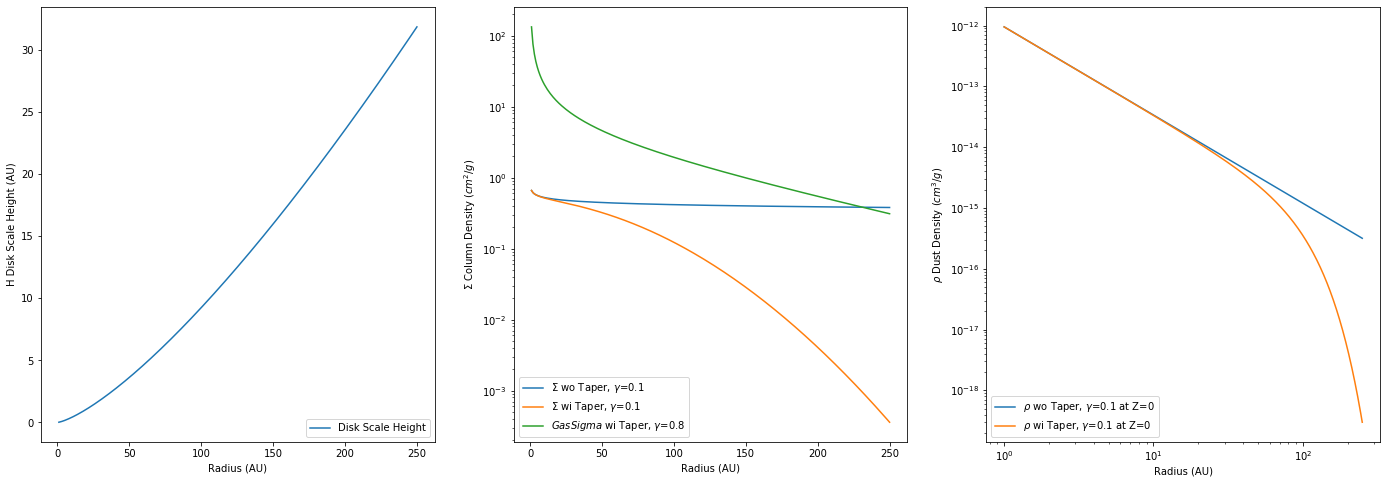

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
r = np.linspace(1*natconst.au, 250*natconst.au, 250, endpoint=True)

# Plot H (Disk Scale Height)
axes[0].plot(r/natconst.au, cal_H(r)/natconst.au, label='Disk Scale Height')
axes[0].set_xlabel(r'Radius (AU)')
axes[0].set_ylabel(r'H Disk Scale Height (AU)')
axes[0].legend(loc=4)

# Plot Column Density (Sigma) wi/wo taper
axes[1].semilogy(r/natconst.au, cal_sigmad_mode1(r, 0.1), label=r'$\Sigma$ wo Taper, $\gamma$={:.1f}'.format(0.1))
axes[1].semilogy(r/natconst.au, cal_sigmad_mode2(r, 0.1), label=r'$\Sigma$ wi Taper, $\gamma$={:.1f}'.format(0.1))
#axes[1].semilogy(r/natconst.au, cal_sigmad_mode2(r, 0.8), label=r'$\Sigma$ wi Taper, $\gamma$={:.1f}'.format(0.8))

#data = analyze.readData(binary=False, ddens=True)
#data.getSigmaDust()
#axes[1].semilogy(r/natconst.au, data.sigmadust, label='$\Sigma$ calculated from RADMC3D')

def cal_sigmag_mode2(cr, cden0, rc, gamma):
    '''
    calculate column density
    with taper term
    '''
    cden = cden0 * ((cr/rc)**(-gamma)) * np.exp(-((cr/rc)**(2-gamma)))
    return cden

def cal_gden_mode3(cr, z, cden, gamma):
    '''
    calculate dust density
    from sigmad with taper term
    with known dust column density
    '''
    H = cal_H(cr)
    den = cden / ((2*np.pi)**0.5 * H) * np.exp(-z**2/(2*H**2))
    return den

sigma12COs = cal_sigmag_mode2(r, 1.6e-3, 165*natconst.au, 0.8)
axes[1].semilogy(r/natconst.au, sigma12COs*1400, label=r'$Gas Sigma$ wi Taper, $\gamma$={:.1f}'.format(0.8))


axes[1].set_xlabel(r'Radius (AU)')
axes[1].set_ylabel(r'$\Sigma$ Column Density ($cm^2/g$)')
#axes[1].set_xscale('log')
axes[1].legend(loc=3)

# Plot Dust Density (Rho) wi/wo taper At z=0
axes[2].semilogy(r/natconst.au, cal_den_mode1(r, np.zeros(250), 0.1), label=r'$\rho$ wo Taper, $\gamma$={:.1f} at Z=0'.format(0.1))
axes[2].semilogy(r/natconst.au, cal_den_mode2(r, np.zeros(250), 0.1), label=r'$\rho$ wi Taper, $\gamma$={:.1f} at Z=0'.format(0.1))
#axes[2].semilogy(r/natconst.au, cal_den_mode2(r, np.zeros(250), 0.8), label=r'$\rho$ wi Taper, $\gamma$={:.1f} at Z=0'.format(0.8))
axes[2].set_xlabel(r'Radius (AU)')
axes[2].set_ylabel(r'$\rho$ Dust Density ($cm^3/g$)')
axes[2].set_xscale('log')
axes[2].legend(loc=3)

plt.show()

### (2) Set Physical Parameters

In [39]:
# Monte Carlo parameters
nphot    = 1000000

# Star parameters
mstar    = 2.3 * natconst.ms
rstar    = 1.66 * natconst.rs
tstar    = 9330.
pstar    = np.array([0.,0.,0.])

# Grid parameters
nr       = 250
ntheta   = 10
nphi     = 1
rin      = 2 * natconst.au
rout     = 252 * natconst.au
thetaup  = np.arccos(cal_H(rout)/rout)    # Unit: Radian     
print('Open Theta Angle is {:.10f} radian'.format(np.pi/2-thetaup))

# Disk parameters
gammad   = 0.1                   # Powerlaw of the dust surface density (gamma)

# Ring Gap parameters
Gpc  = [60.*natconst.au, 100.*natconst.au, 160.*natconst.au]         # Unit: cm
#Gwid = [15.*natconst.au, 12.*natconst.au, 15.*natconst.au]           # Unit: cm
#Gcden = [3e-2, 3e-2, 5e-3]                                           # Unit: g/cm^2 (Those are Upper Limits)

# Different Ring Gap parameters
# Widest Gap parameters
Wwid = [33.*natconst.au, 26.*natconst.au, 55.*natconst.au] 
Wdep = [13., 7., 3.6]
# Narrowest Gap parameters
Nwid = [15.*natconst.au, 12.*natconst.au, 15.*natconst.au] 
Ndep = [150., 70., 6.]

Open Theta Angle is 0.1282561771 radian


### (3) Make Parameters

In [40]:
# Write the wavelength_micron.inp file
lam1     = 0.1e0
lam2     = 7.0e0
lam3     = 25.0e0
lam4     = 1.0e4
n12      = 20
n23      = 100
n34      = 30
lam12    = np.logspace(np.log10(lam1),np.log10(lam2),n12,endpoint=False)
lam23    = np.logspace(np.log10(lam2),np.log10(lam3),n23,endpoint=False)
lam34    = np.logspace(np.log10(lam3),np.log10(lam4),n34,endpoint=True)
lam      = np.concatenate([lam12,lam23,lam34])
nlam     = lam.size

### (4) Calculate Dust Density and Column Density

In [41]:
def make_ring_gap(rc, density, Gpc, wid, dep):
    for i, gp in enumerate(Gpc):
        density[abs(rc-gp) < wid[i]/2] /= dep[i]
    return density

In [42]:
# Make the coordinates
ri       = np.linspace(rin, rout, nr+1)
thetai   = np.linspace(thetaup, 0.5e0*np.pi, ntheta+1)
phii     = np.linspace(0.0e0, np.pi*2.e0, nphi+1)
rc       = 0.5 * (ri[0:nr] + ri[1:nr+1])
thetac   = 0.5 * (thetai[0:ntheta] + thetai[1:ntheta+1])
phic     = 0.5 * (phii[0:nphi] + phii[1:nphi+1])

# Make the grid
qq       = np.meshgrid(rc,thetac,phic,indexing='ij')
rr       = qq[0]
tt       = qq[1]
zr       = np.pi/2.e0 - qq[1]

# Calculate Column Density and Density, Then make Gaps
sigmads = cal_sigmad_mode2(rr*np.cos(zr), gammad)
sigmad = make_ring_gap(rr*np.cos(zr), sigmads, Gpc=Gpc, wid=Wwid, dep=Wdep)

# Calculate Dust Density
ddens = cal_den_mode3(rr*np.cos(zr), rr*np.sin(zr), sigmad, gammad)

### (5) Plot Column Density And Density

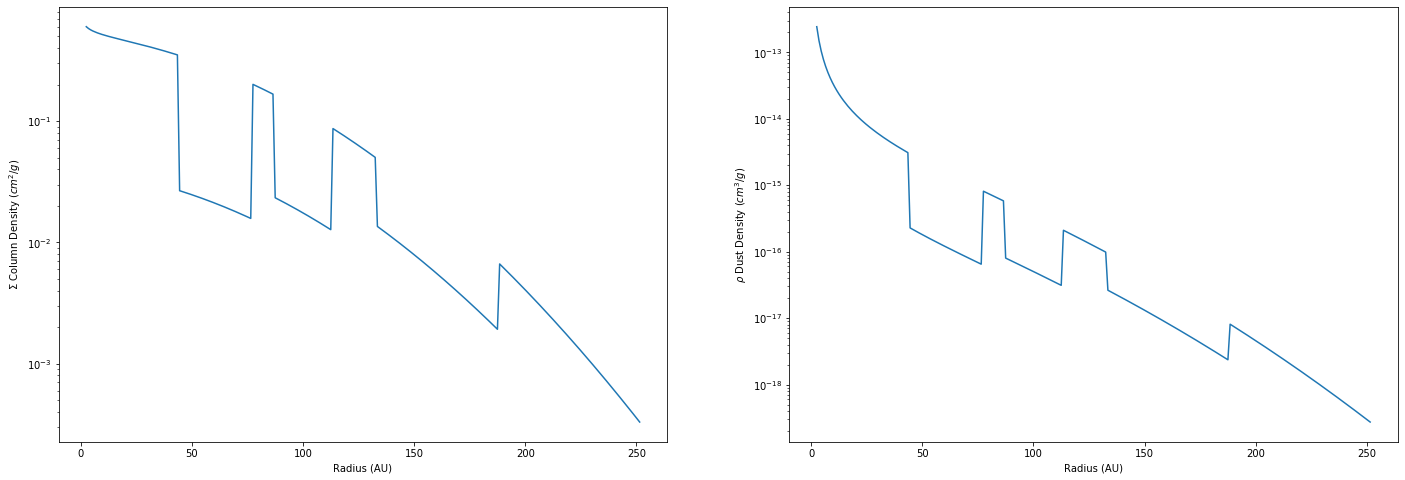

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
# Plot Column Density (Sigma) wi/wo taper
axes[0].semilogy(rr[:,0,0]/natconst.au, sigmad[:,-1,0])
axes[0].set_xlabel(r'Radius (AU)')
axes[0].set_ylabel(r'$\Sigma$ Column Density ($g/cm^2$)')
#axes[0].legend(loc=3)
#axes[0].set_xscale('log')

# Plot Dust Density (Rho) wi/wo taper At z=0
axes[1].semilogy(rr[:,0,0]/natconst.au, ddens[:,-1,0])
axes[1].set_xlabel(r'Radius (AU)')
axes[1].set_ylabel(r'$\rho$ Dust Density ($g/cm^3$)')
#axes[1].legend(loc=3)
#axes[1].set_xscale('log')

plt.show()

## 03 - Calculate Dust Temperature
There are two ways to get dust temperature

### (1) Option 1 - Derived From Monte Carlo Simulation

In [44]:
# from os import system
# from time import time
# tstart = time()
# system('radmc3d mctherm')
# tend = time()
# print('MCtherm Process: {:.1e} photons took {:.6f} secs'.format(nphot, tend-tstart))

### (2) Option 2 - Derived From Known Temperature Dist. 
* #### Note: Assuming Dust temperature equals to Gas temperature

In [45]:
def cal_zq(cr):
    '''
    calculate height of disk atmosphere
    '''
    zq0 = 63*natconst.au
    #zq = zq0 * (cr/(200*natconst.au))**1.3 * np.exp(-(cr/(800*natconst.au))**2)
    zq = zq0 * (cr/(200*natconst.au))**(1.3) * np.exp(-(cr/(800*natconst.au))**2)
    return zq

def cal_delta(cr):
    '''
    calculate vertical shape control parameter
    '''
    delta = 0.0034 * (cr/natconst.au-200) + 2.5
    if delta <= 0.3:
        delta = 0.3
    return delta

def cal_Ta(cr, z):
    '''
    calculate atmosphere temperature
    '''
    #Ta = 55. * (((cr**2 + z**2)**0.5) / (200*natconst.au)) ** (-0.5)
    Ta = 68. * (((cr**2 + z**2)**0.5) / (100*natconst.au)) ** (-0.6)
    return Ta

def cal_Tm(cr):
    '''
    calculate midplane temperature (z=0)
    '''
    #Tm = 19. * (cr/(155*natconst.au)) ** (-0.3)
    Tm = 24. * (cr/(100*natconst.au)) ** (-0.5)
    return Tm

def cal_Tgas(cr, z):
    '''
    calculate gas temperature dist.
    '''
    Ta = cal_Ta(cr, z)
    Tm = cal_Tm(cr)
    zq = cal_zq(cr)
    delta = cal_delta(cr)
    if zq > z:
        Tgas = Ta + (Tm - Ta) * np.cos(np.pi/2 * (z/zq)) ** (2*delta)
    else:
        Tgas = Ta
    return Tgas

# These Two functions need to be vectorized for multi-D if statement
cal_delta = np.vectorize(cal_delta)
cal_Tgas  = np.vectorize(cal_Tgas)

In [46]:
# Make the gas temperature model
Tgas = cal_Tgas(rr*np.cos(zr), rr*np.sin(zr))

# Write the dust temperature file
with open('dust_temperature.dat','w+') as f:
    f.write('1\n')                       # Format number
    f.write('%d\n'%(nr*ntheta*nphi))     # Nr of cells
    f.write('1\n')                       # Nr of dust species
    data = Tgas.ravel(order='F')         # Create a 1-D view, fortran-style indexing
    data.tofile(f, sep='\n', format="%13.6e")
    f.write('\n')

## 03 -  Make Input Inp Files

### (1) Wavelength

In [47]:
# Write the wavelength file
with open('wavelength_micron.inp','w+') as f:
    f.write('%d\n'%(nlam))
    for value in lam:
        f.write('%13.6e\n'%(value))

### (2) Star (Radiation Source)

In [48]:
# Write the stars.inp file
with open('stars.inp','w+') as f:
    f.write('2\n')
    f.write('1 %d\n\n'%(nlam))
    f.write('%13.6e %13.6e %13.6e %13.6e %13.6e\n\n'%(rstar,mstar,pstar[0],pstar[1],pstar[2]))
    for value in lam:
        f.write('%13.6e\n'%(value))
    f.write('\n%13.6e\n'%(-tstar))

### (3) AMR Grid (Meshgrid Point Table for Radmc3d)

In [49]:
# Write the grid file
with open('amr_grid.inp','w+') as f:
    f.write('1\n')                       # iformat
    f.write('0\n')                       # AMR grid style  (0=regular grid, no AMR)
    f.write('100\n')                     # Coordinate system: spherical
    f.write('0\n')                       # gridinfo
    f.write('1 1 0\n')                   # Include r,theta coordinates
    f.write('%d %d %d\n'%(nr,ntheta,1))  # Size of grid
    for value in ri:
        f.write('%13.6e\n'%(value))      # X coordinates (cell walls)
    for value in thetai:
        f.write('%13.6e\n'%(value))      # Y coordinates (cell walls)
    for value in phii:
        f.write('%13.6e\n'%(value))      # Z coordinates (cell walls)

### (4) Dust Density

In [50]:
# Write the dust density file
with open('dust_density.inp','w+') as f:
    f.write('1\n')                       # Format number
    f.write('%d\n'%(nr*ntheta*nphi))     # Nr of cells
    f.write('1\n')                       # Nr of dust species
    data = ddens.ravel(order='F')        # Create a 1-D view, fortran-style indexing
    data.tofile(f, sep='\n', format="%13.6e")
    f.write('\n')

### (5) Dust Opacity (Control File for Dust Opacity)

In [79]:
with open('dustkappa_silicate.inp', 'w+') as out:
    data = open('dustkappa_silicate-Copy1.inp', 'r').readlines()[2:]
    out.write('2\n240\n')
    factor = 36
    for i in range(len(data)):
        if float(data[i].split()[0]) > 10.:
            row = data[i].split()
            row[1] = '{:.6e}'.format(float(row[1])*factor)
            row[2] = '{:.6e}'.format(float(row[2])*factor)
            out.write('\t'.join(row) + '\n')

In [51]:
# Dust opacity control file
with open('dustopac.inp','w+') as f:
    f.write('2               Format number of this file\n')
    f.write('1               Nr of dust species\n')
    f.write('============================================================================\n')
    f.write('1               Way in which this dust species is read\n')
    f.write('0               0=Thermal grain\n')
    f.write('silicate        Extension of name of dustkappa_***.inp file\n')
    f.write('----------------------------------------------------------------------------\n')

### (6) Radmc3D Input (Control File for Monte Carlo Simulation)

In [52]:
# Write the radmc3d.inp control file
with open('radmc3d.inp','w+') as f:
    f.write('nphot = %d\n'%(nphot))
    f.write('scattering_mode_max = 1\n')
    f.write('modified_random_walk = 1\n')  # Put this to 1 for random walk
    f.write('iranfreqmode = 1\n')

## 04 - Make SED 

In [35]:
# # Make the SED as seen at 1 pc distance
# from os import system
# from time import time
# tstart = time()
# system("radmc3d sed incl 42 posang 132")
# tend = time()
# print('SED-making Process took {:.6f} secs'.format(tend-tstart))